In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset 

In [27]:
df = pd.read_csv('Financial Analytics data.csv')

In [28]:
df.head(10)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
5,6,Hind. Unilever,288265.26,8590.00,NaN
6,7,Maruti Suzuki,263493.81,19283.20,NaN
7,8,Infosys,248320.35,17794.00,NaN
8,9,O N G C,239981.50,22995.88,NaN
9,10,St Bk of India,232763.33,57014.08,NaN


## Data Cleaning and Preparation

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [30]:
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [31]:
df = df.drop(columns=['Unnamed: 4'])

In [32]:
df.fillna(df.mean(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3112\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    488 non-null    float64
 3   Sales Qtr - Crore  488 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


### Dataset after data cleaning and preprocessing

In [34]:
df.head(10)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
5,6,Hind. Unilever,288265.26,8590.00
6,7,Maruti Suzuki,263493.81,19283.20
7,8,Infosys,248320.35,17794.00
8,9,O N G C,239981.50,22995.88
9,10,St Bk of India,232763.33,57014.08


## Descriptive statistics to show the distribution of the data

In [35]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,28043.857119,4395.976849
std,145.884078,58912.585788,9589.680655
min,1.000000,3017.070000,47.240000
25%,122.750000,4879.612500,725.732500
50%,252.500000,10380.425000,2095.335000
75%,378.250000,25502.085000,4395.976849
max,500.000000,583436.720000,110666.930000


### Top 10 companies by market capitalization

In [36]:
top_companies = df.nlargest(10, 'Mar Cap - Crore')
print(top_companies[['Name', 'Mar Cap - Crore']])

             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50
9  St Bk of India        232763.33


### Top 10 companies by quarterly sales

In [37]:
top_sales = df.nlargest(10, 'Sales Qtr - Crore')
print(top_sales[['Name', 'Sales Qtr - Crore']])

                Name  Sales Qtr - Crore
14           I O C L          110666.93
0     Reliance Inds.           99810.00
23       Tata Motors           74156.07
27           B P C L           60616.36
54           H P C L           57474.25
9     St Bk of India           57014.08
122   Rajesh Exports           41304.84
40        Tata Steel           32464.14
1                TCS           30904.00
13   Larsen & Toubro           28747.45


## Visualization to understand the distribution and relationships between attributes

In [38]:
import seaborn as sns

### Distribution of Market Capitalization

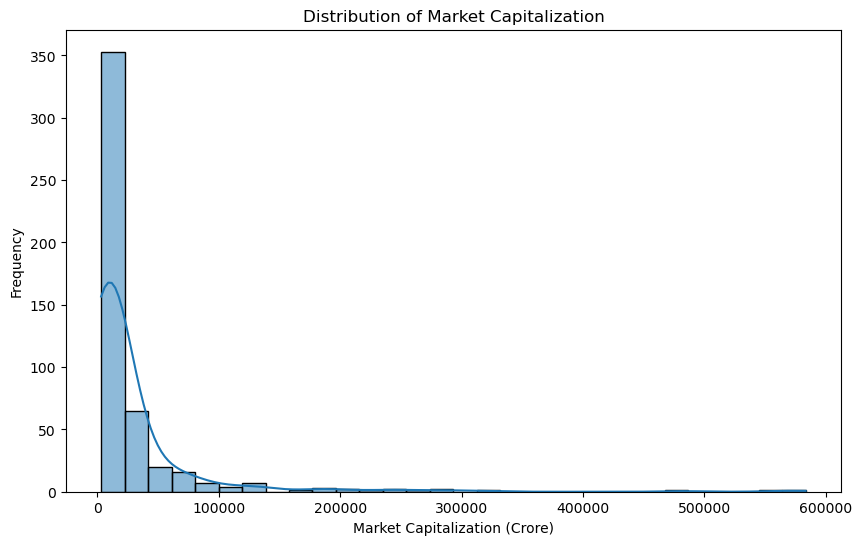

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mar Cap - Crore'], bins=30, kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')
plt.show()

### Distribution of Quarterly Sales

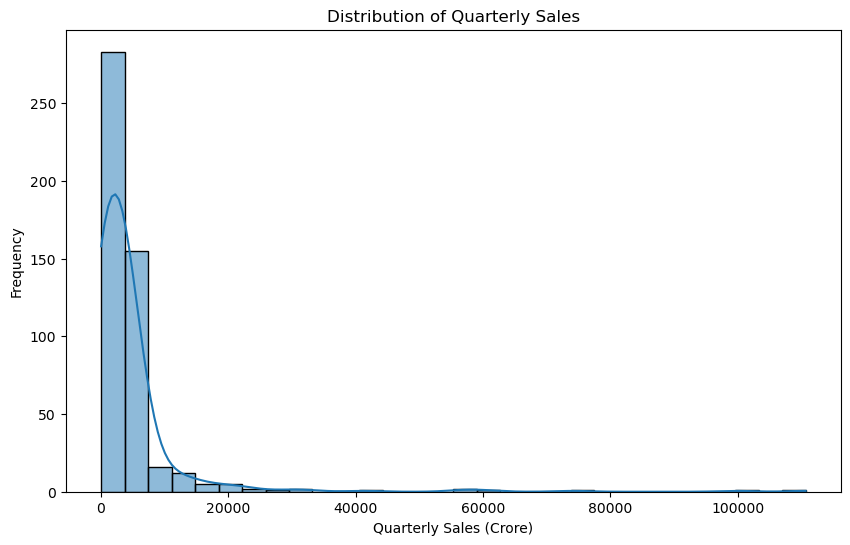

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Qtr - Crore'], bins=30, kde=True)
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Frequency')
plt.show()

### Scatter plot of Market Cap vs. Quarterly Sales

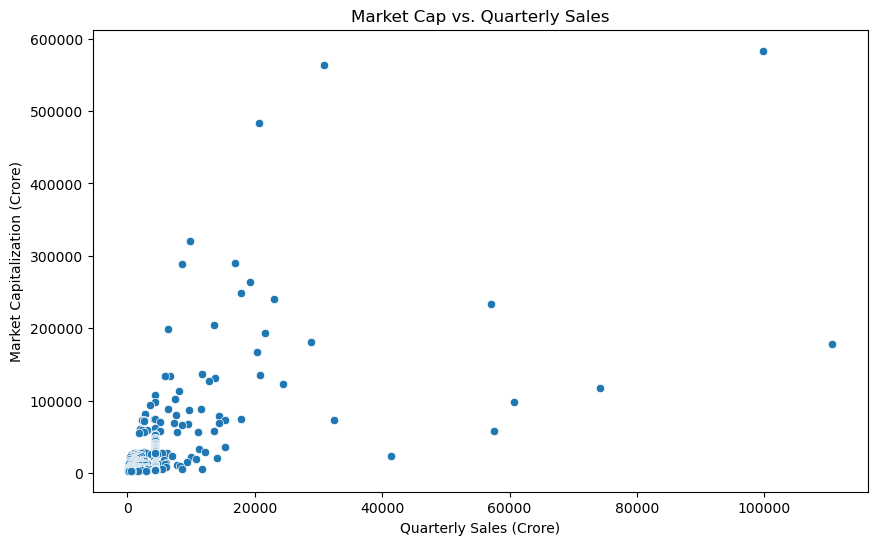

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=df)
plt.title('Market Cap vs. Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Capitalization (Crore)')
plt.show()

## Correlation Analysis between market capitalization and quarterly sales

In [42]:
corr_matrix = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
print(corr_matrix)

                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.612336
Sales Qtr - Crore         0.612336           1.000000


### Heatmap of the correlation matrix

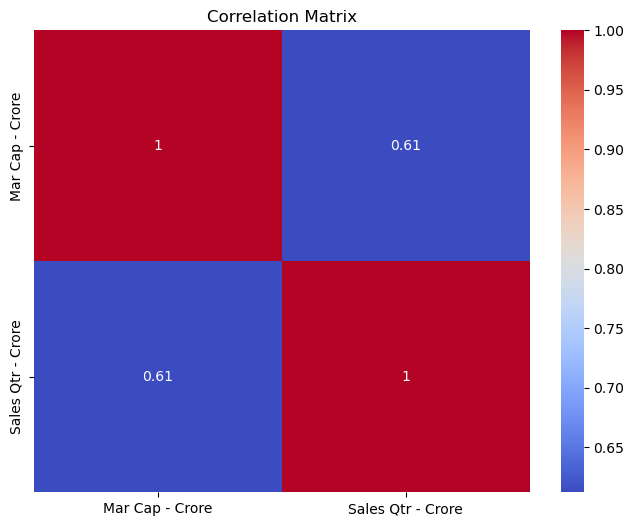

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Clustering Analysis

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [45]:
# Select features for clustering
features = df[['Mar Cap - Crore', 'Sales Qtr - Crore']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

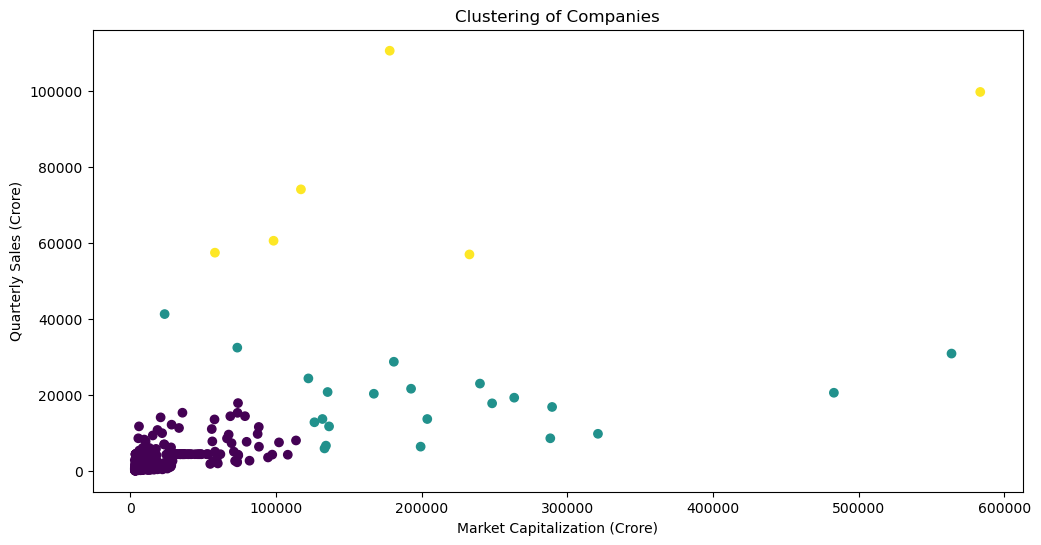

In [46]:
# Plot clusters
plt.figure(figsize=(12, 6))
plt.scatter(df['Mar Cap - Crore'], df['Sales Qtr - Crore'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering of Companies')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

## Predictive Analysis

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
# Assuming 'Mar Cap - Crore' is the target and 'Sales Qtr - Crore' is the feature
X = df[['Sales Qtr - Crore']]
y = df['Mar Cap - Crore']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [49]:
# Evaluating the model
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 20064.202968313562
Mean Squared Error: 1537463338.8048239
R^2 Score: 0.6734844495018167


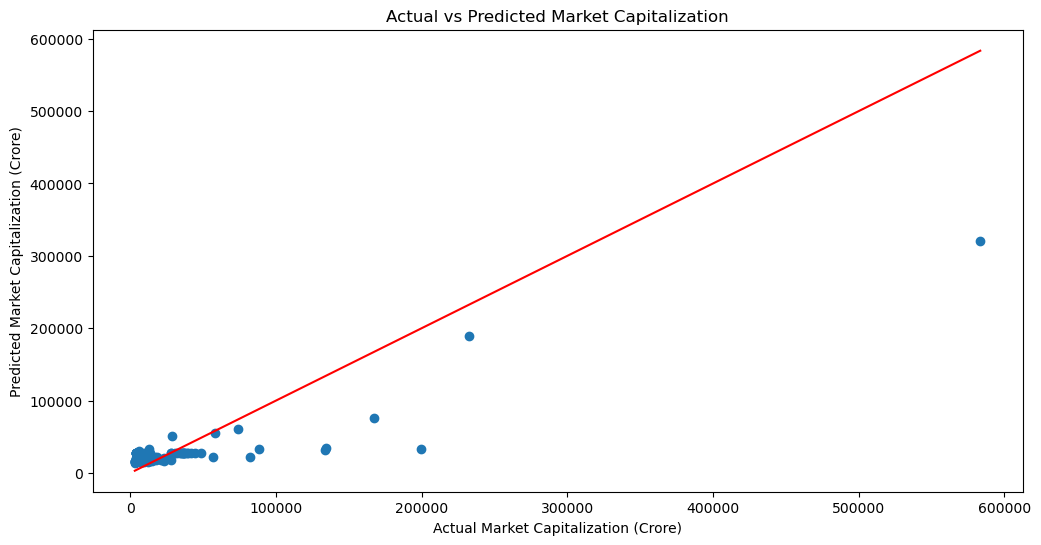

In [50]:
# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Actual vs Predicted Market Capitalization')
plt.xlabel('Actual Market Capitalization (Crore)')
plt.ylabel('Predicted Market Capitalization (Crore)')
plt.show()